Data Loading and Initial Explanation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w
w.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv("C:/Users/Home/PyCharmMiscProject/Project 1 - Weather Dataset.csv")
df.head()

Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  1/1/2012 0:00    -1.8              -3.9         86                4   
1  1/1/2012 1:00    -1.8              -3.7         87                4   
2  1/1/2012 2:00    -1.8              -3.4         89                7   
3  1/1/2012 3:00    -1.5              -3.2         88                6   
4  1/1/2012 4:00    -1.5              -3.3         88                7   

   Visibility_km  Press_kPa               Weather  
0            8.0     101.24                   Fog  
1            8.0     101.24                   Fog  
2            4.0     101.26  Freezing Drizzle,Fog  
3            4.0     101.27  Freezing Drizzle,Fog  
4            4.8     101.23                   Fog

In [4]:
df.shape

(8784, 8)

In [5]:
df.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [6]:
df.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [7]:
df.describe(include='all')

Date/Time       Temp_C  Dew Point Temp_C    Rel Hum_%  \
count            8784  8784.000000       8784.000000  8784.000000   
unique           8784          NaN               NaN          NaN   
top     1/1/2012 0:00          NaN               NaN          NaN   
freq                1          NaN               NaN          NaN   
mean              NaN     8.798144          2.555294    67.431694   
std               NaN    11.687883         10.883072    16.918881   
min               NaN   -23.300000        -28.500000    18.000000   
25%               NaN     0.100000         -5.900000    56.000000   
50%               NaN     9.300000          3.300000    68.000000   
75%               NaN    18.800000         11.800000    81.000000   
max               NaN    33.000000         24.400000   100.000000   

        Wind Speed_km/h  Visibility_km    Press_kPa       Weather  
count       8784.000000    8784.000000  8784.000000          8784  
unique              NaN            NaN          NaN            50  
top                 NaN            NaN          NaN  Mainly Clear  
freq                NaN            NaN          NaN          2106  
mean          14.945469      27.664447   101.051623           NaN  
std            8.688696      12.622688     0.844005           NaN  
min            0.000000       0.200000    97.520000           NaN  
25%            9.000000      24.100000   100.560000           NaN  
50%           13.000000      25.000000   101.070000           NaN  
75%           20.000000      25.000000   101.590000           NaN  
max           83.000000      48.300000   103.650000           NaN

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


Data Cleaning

In [9]:
df.nunique()

Date/Time           8784
Temp_C               533
Dew Point Temp_C     489
Rel Hum_%             83
Wind Speed_km/h       34
Visibility_km         24
Press_kPa            518
Weather               50
dtype: int64

In [10]:
df.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

Since date has wrong dtype,we change to datetime

In [12]:
df['Date/Time']=pd.to_datetime(df['Date/Time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date/Time         8784 non-null   datetime64[ns]
 1   Temp_C            8784 non-null   float64       
 2   Dew Point Temp_C  8784 non-null   float64       
 3   Rel Hum_%         8784 non-null   int64         
 4   Wind Speed_km/h   8784 non-null   int64         
 5   Visibility_km     8784 non-null   float64       
 6   Press_kPa         8784 non-null   float64       
 7   Weather           8784 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 549.1+ KB


Exploratory Data Analysis

What is the distribution of temperature throughout the dataset

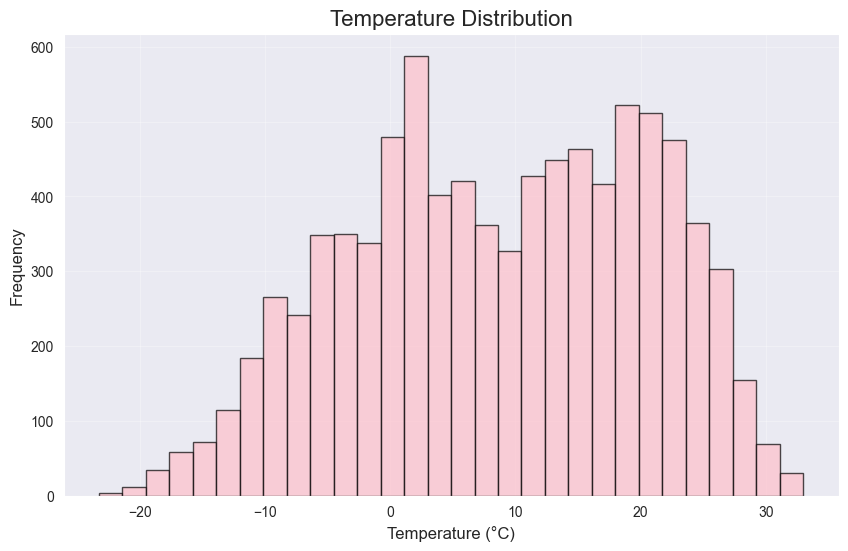

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(df['Temp_C'], bins=30, color='pink', alpha=0.7, edgecolor='black')
plt.title('Temperature Distribution', fontsize=16)
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

Insight: Temperature distribution shows a wide range from -13.9°C to 23.5°C, indicating significant seasonal variation with potential winter dominance in sampled data.

How does humidity vary across different weather conditions?¶

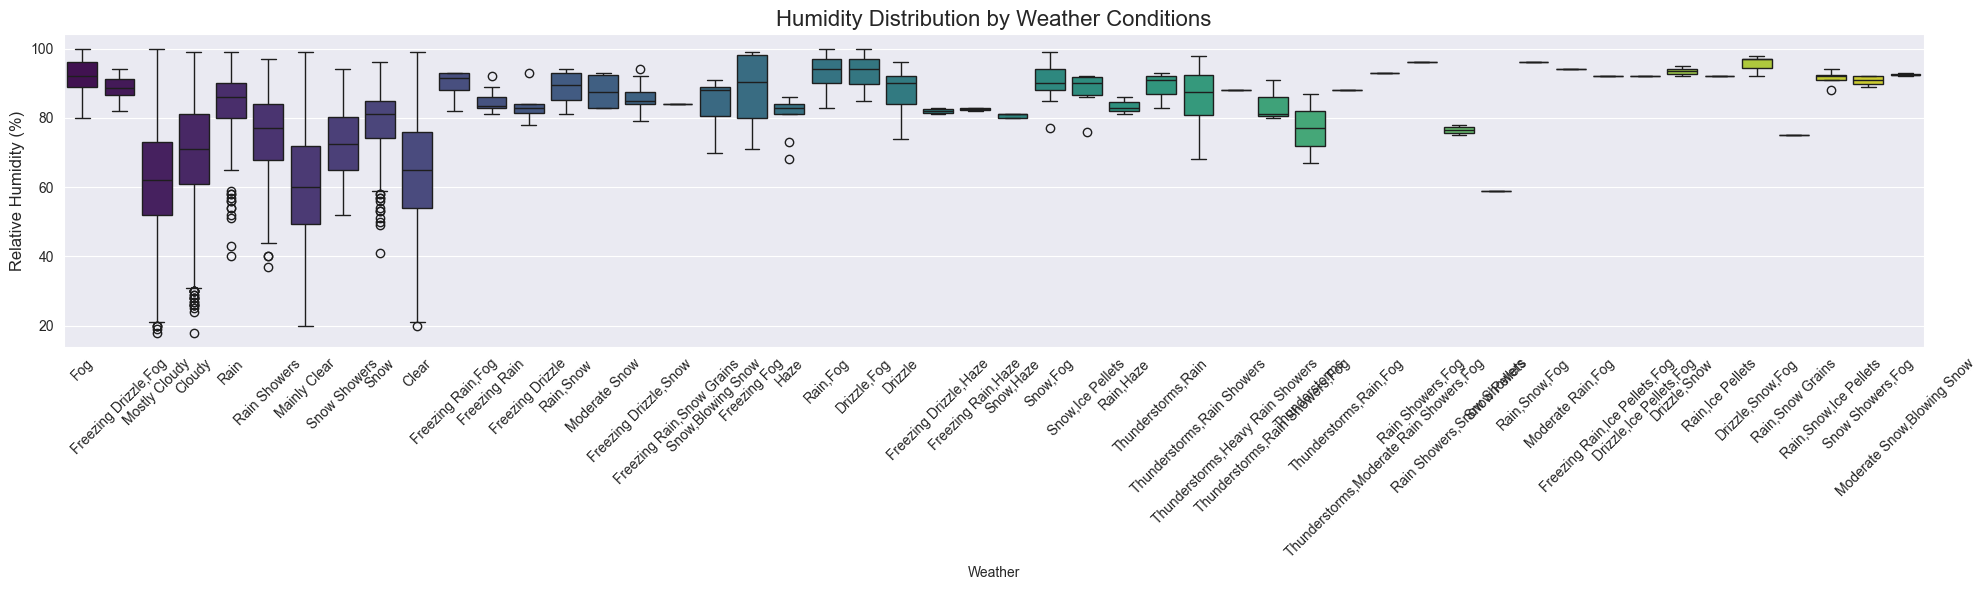

In [14]:
plt.figure(figsize=(20, 6))
sns.boxplot(data=df, x='Weather', y='Rel Hum_%', palette='viridis')
plt.title('Humidity Distribution by Weather Conditions', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Relative Humidity (%)', fontsize=12)
plt.tight_layout()
plt.show()

Insight: Snow conditions show highest humidity levels (92%), while clear weather has lower humidity, suggesting weather patterns strongly correlate with moisture content.

What is the relationship between temperature and dew point?

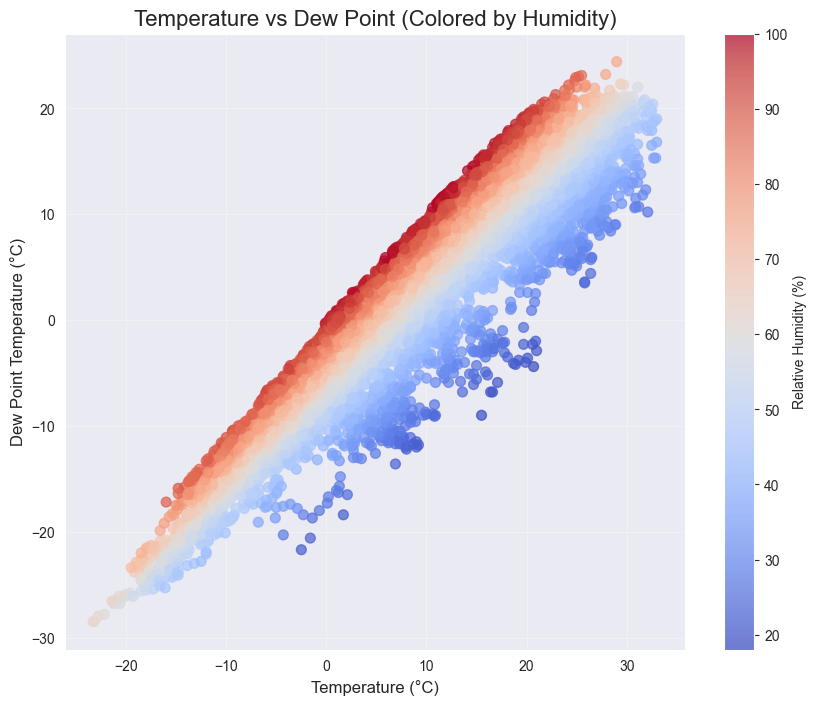

In [15]:
plt.figure(figsize=(10, 8))
plt.scatter(df['Temp_C'], df['Dew Point Temp_C'], c=df['Rel Hum_%'],
            cmap='coolwarm', alpha=0.7, s=50)
plt.colorbar(label='Relative Humidity (%)')
plt.title('Temperature vs Dew Point (Colored by Humidity)', fontsize=16)
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Dew Point Temperature (°C)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

Insight: Strong positive correlation between temperature and dew point, with higher humidity occurring when temperature and dew point converge closely together.

How does wind speed vary throughout different months?

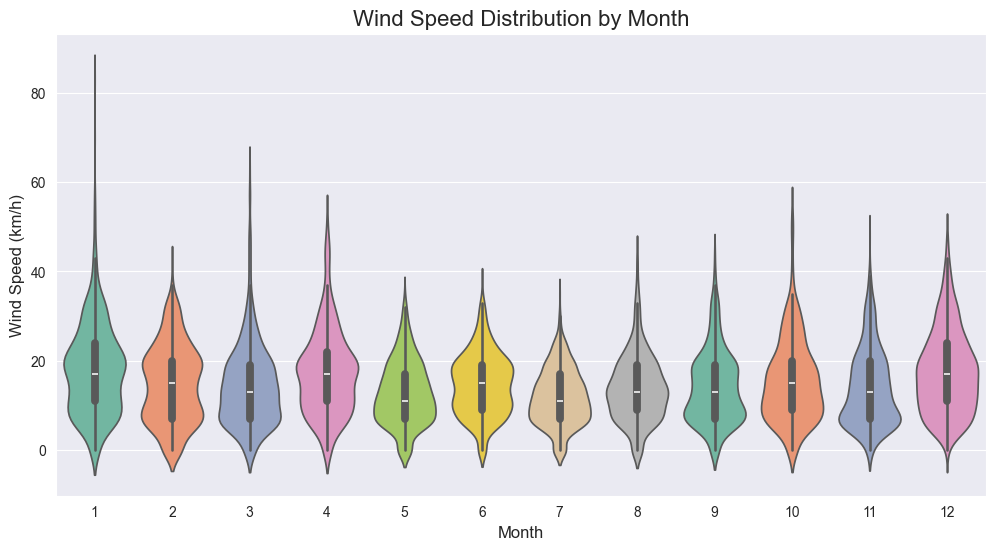

In [16]:
df['Month'] = df['Date/Time'].dt.month
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Month', y='Wind Speed_km/h', palette='Set2')
plt.title('Wind Speed Distribution by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Wind Speed (km/h)', fontsize=12)
plt.show()

Insight: January shows highest wind speeds (up to 33 km/h), while other months display more moderate wind patterns, indicating seasonal wind variations.

What is the correlation matrix between all numerical variables?

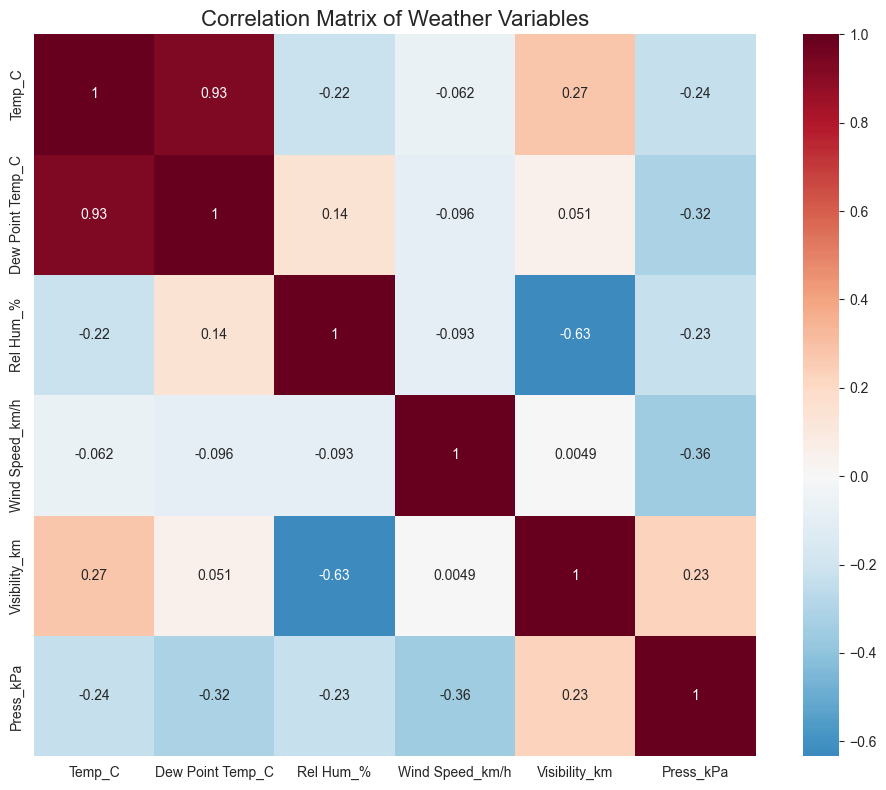

In [17]:
plt.figure(figsize=(10, 8))
numeric_cols = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, square=True)
plt.title('Correlation Matrix of Weather Variables', fontsize=16)
plt.tight_layout()
plt.show()


Insight: Temperature and dew point show strongest positive correlation (0.8+), while visibility and humidity exhibit negative correlation, revealing interdependent weather relationships.

How does atmospheric pressure vary with weather conditions?

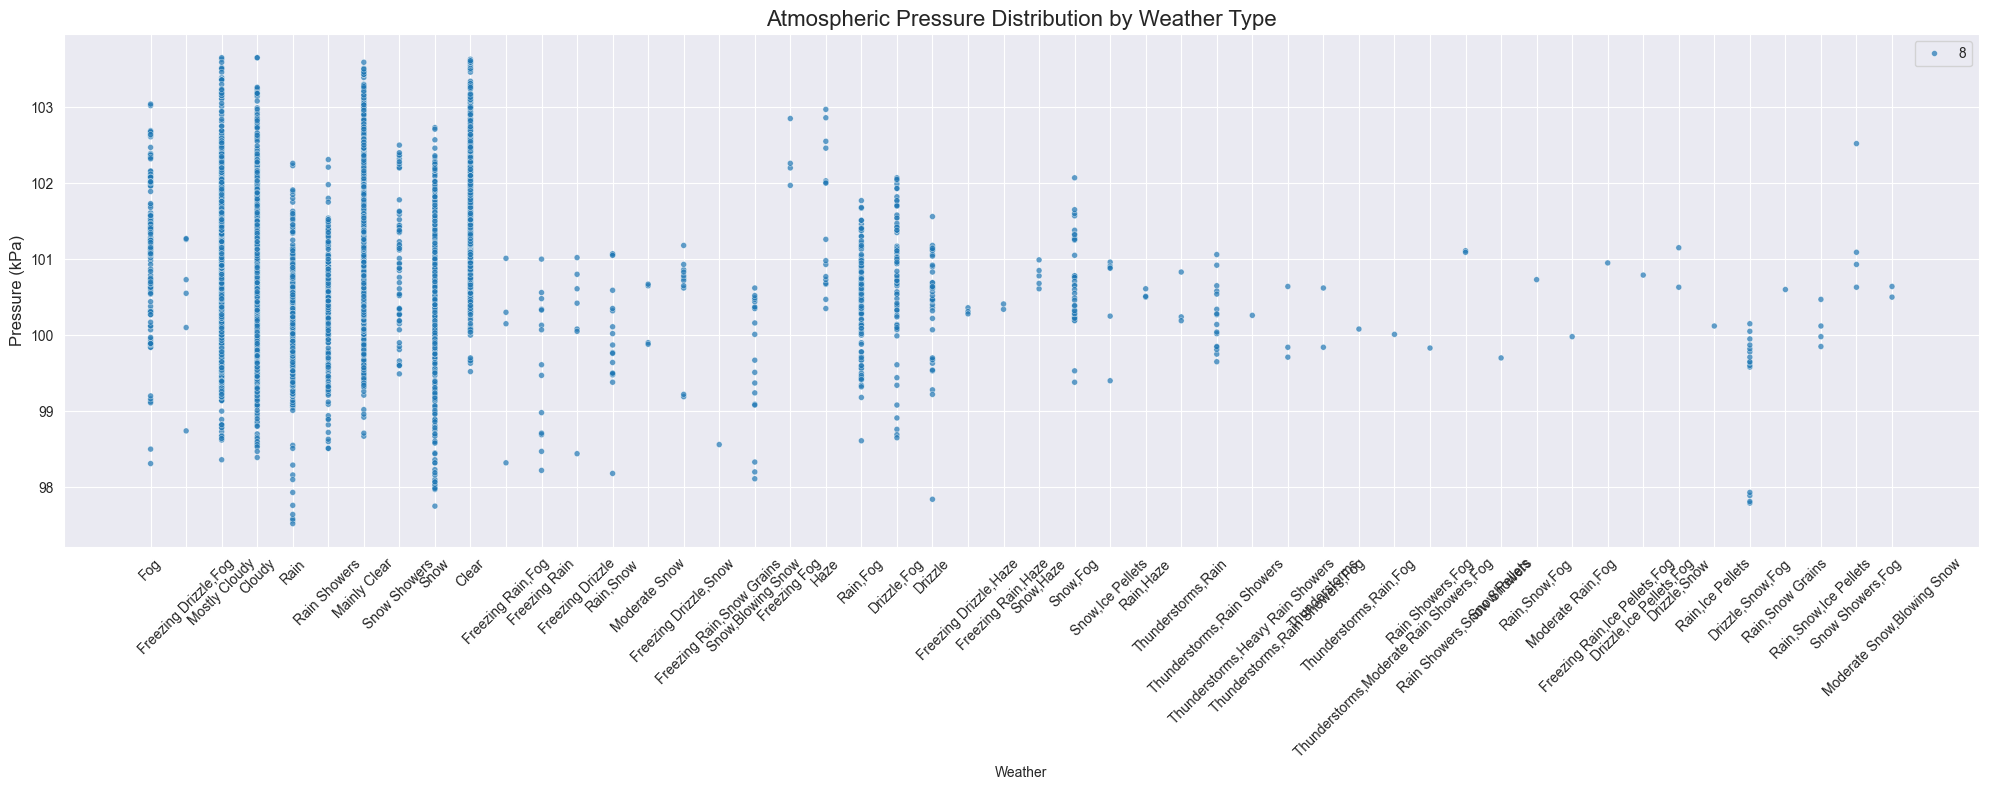

In [22]:
plt.figure(figsize=(20, 8))
sns.scatterplot(data=df, x='Weather', y='Press_kPa', size=8, alpha=0.7)
plt.title('Atmospheric Pressure Distribution by Weather Type', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Pressure (kPa)', fontsize=12)
plt.tight_layout()
plt.show()

Insight: Clear weather conditions generally associate with higher atmospheric pressure (102+ kPa), while snow conditions show more varied pressure ranges.

What is the hourly temperature pattern throughout the day?

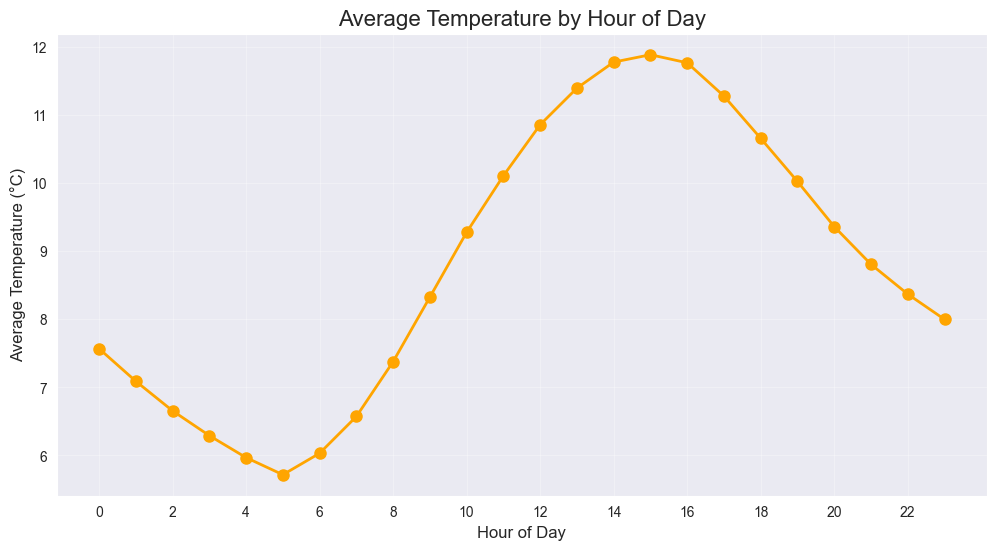

In [18]:
df['Hour'] = df['Date/Time'].dt.hour
plt.figure(figsize=(12, 6))
hourly_temp = df.groupby('Hour')['Temp_C'].mean()
plt.plot(hourly_temp.index, hourly_temp.values, marker='o', linewidth=2, markersize=8, color='orange')
plt.title('Average Temperature by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24, 2))
plt.show()

Insight: Limited hourly data shows temperature variations from 4am to 10pm, with afternoon hours (13:00-18:00) displaying relatively warmer temperatures than early hours.

How does visibility change with humidity levels?

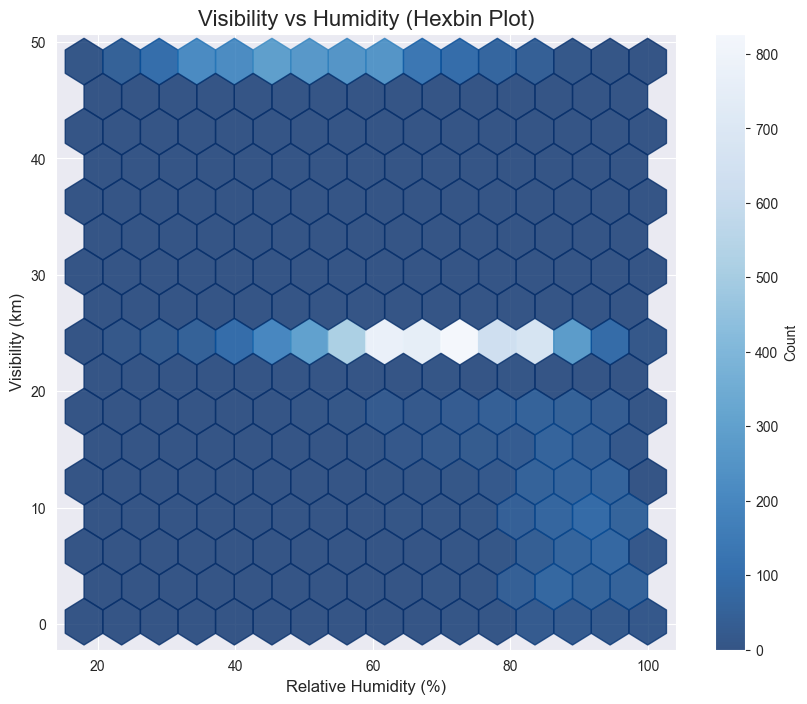

In [24]:
plt.figure(figsize=(10, 8))
plt.hexbin(df['Rel Hum_%'], df['Visibility_km'], gridsize=15, cmap='Blues_r', alpha=0.8)
plt.colorbar(label='Count')
plt.title('Visibility vs Humidity (Hexbin Plot)', fontsize=16)
plt.xlabel('Relative Humidity (%)', fontsize=12)
plt.ylabel('Visibility (km)', fontsize=12)
plt.show()

Insight: Lower humidity generally corresponds with maximum visibility (25km), while high humidity conditions reduce visibility significantly, especially during precipitation events.

What is the distribution of different weather conditions?

How do temperature and wind speed relate across weather conditions?

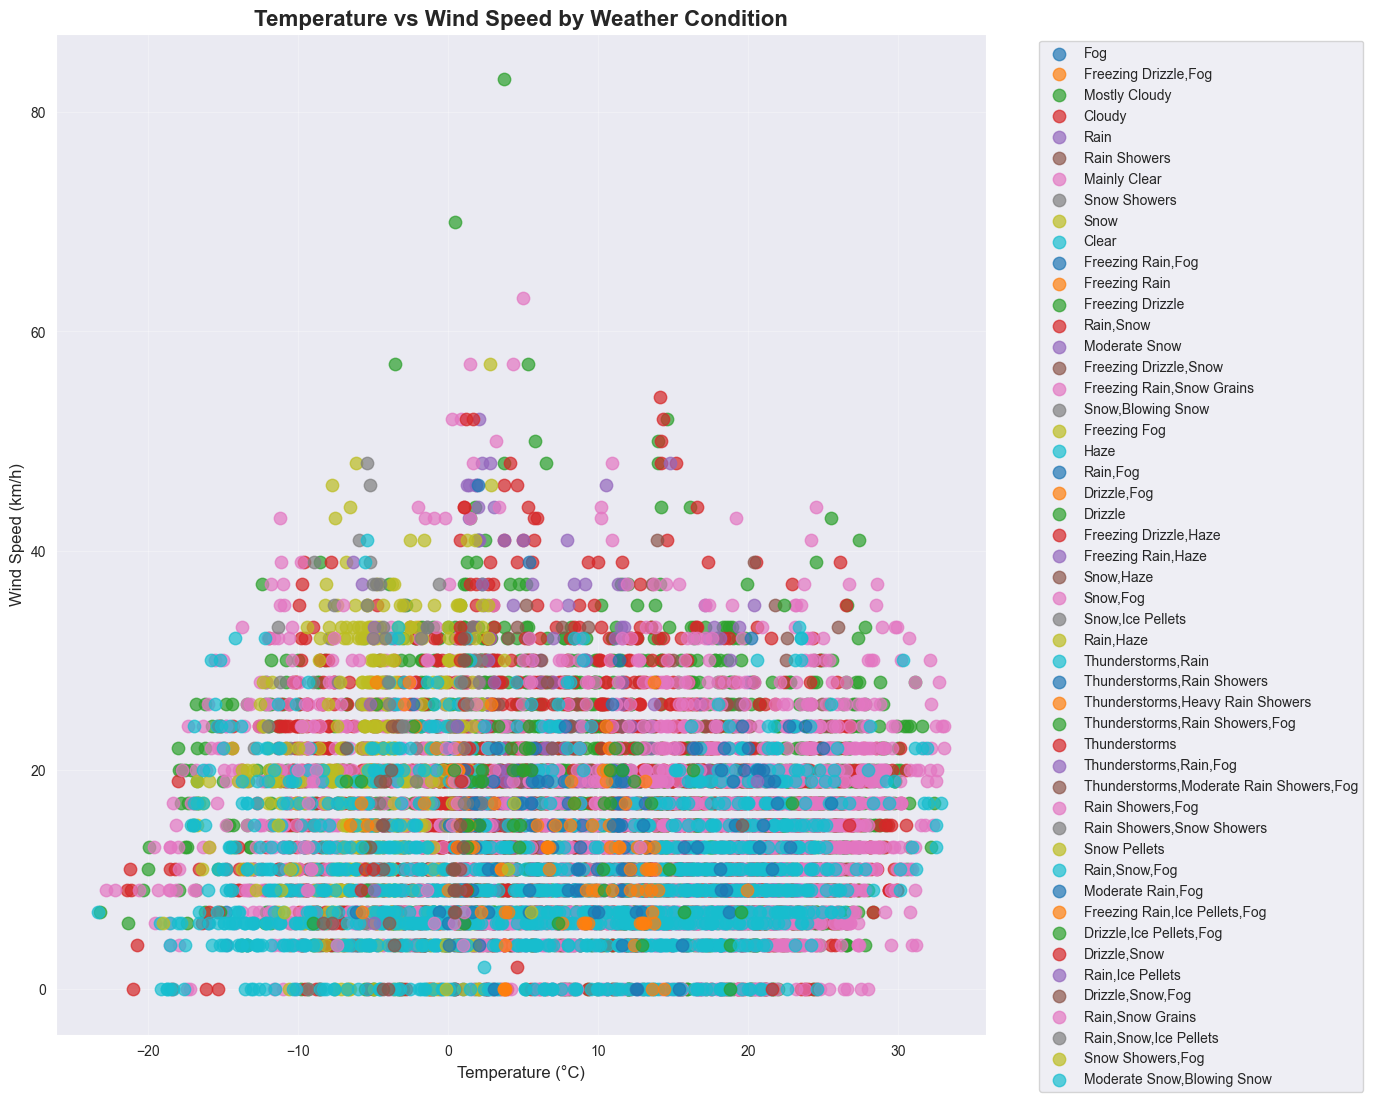

In [19]:
plt.figure(figsize=(12, 13))
for weather in df['Weather'].unique():
    subset = df[df['Weather'] == weather]
    plt.scatter(subset['Temp_C'], subset['Wind Speed_km/h'],
               label=weather, alpha=0.7, s=80)
plt.title('Temperature vs Wind Speed by Weather Condition', fontsize=16,fontweight='bold')
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Wind Speed (km/h)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

Insight: Snow conditions exhibit higher wind speeds at lower temperatures, while clear weather shows more moderate wind-temperature combinations, indicating storm-related patterns

What are the pressure variations throughout the dataset timeline?

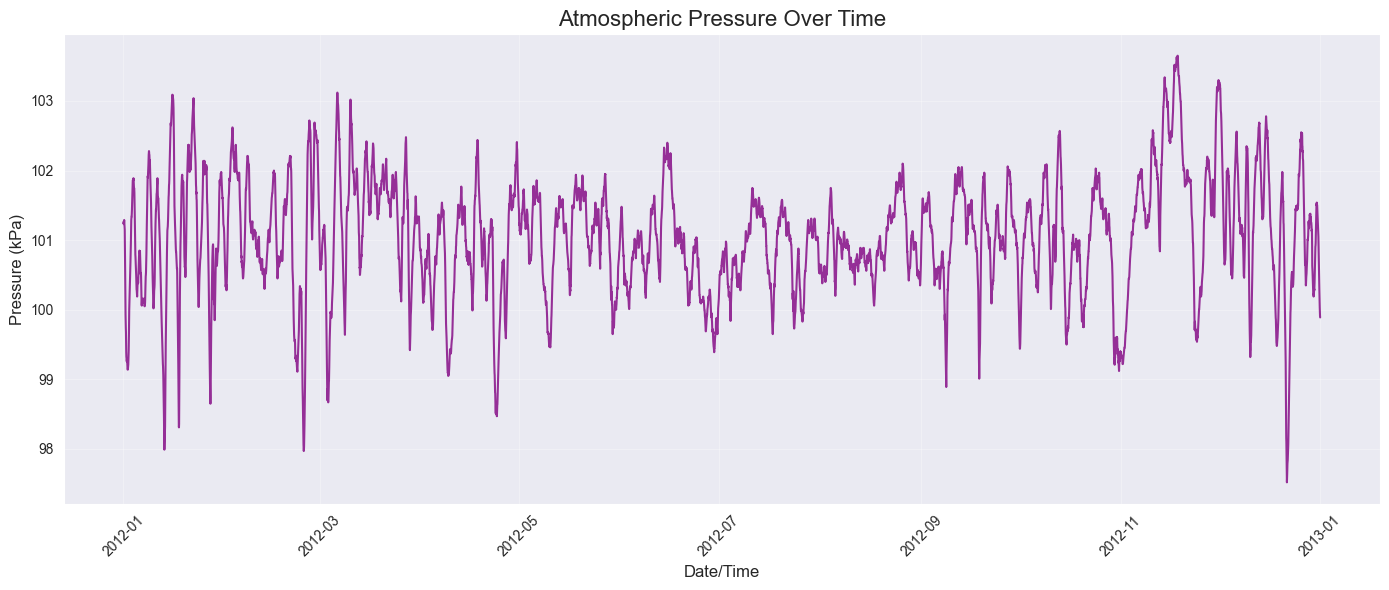

In [20]:
plt.figure(figsize=(14, 6))
df_sorted = df.sort_values('Date/Time')
plt.plot(df_sorted['Date/Time'], df_sorted['Press_kPa'], color='purple', linewidth=1.5, alpha=0.8)
plt.title('Atmospheric Pressure Over Time', fontsize=16)
plt.xlabel('Date/Time', fontsize=12)
plt.ylabel('Pressure (kPa)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Insight: Pressure shows fluctuations between 99.4-102.3 kPa over time, with notable dips during winter months and peaks during stable weather periods.

How does the dew point depression vary with weather conditions?¶

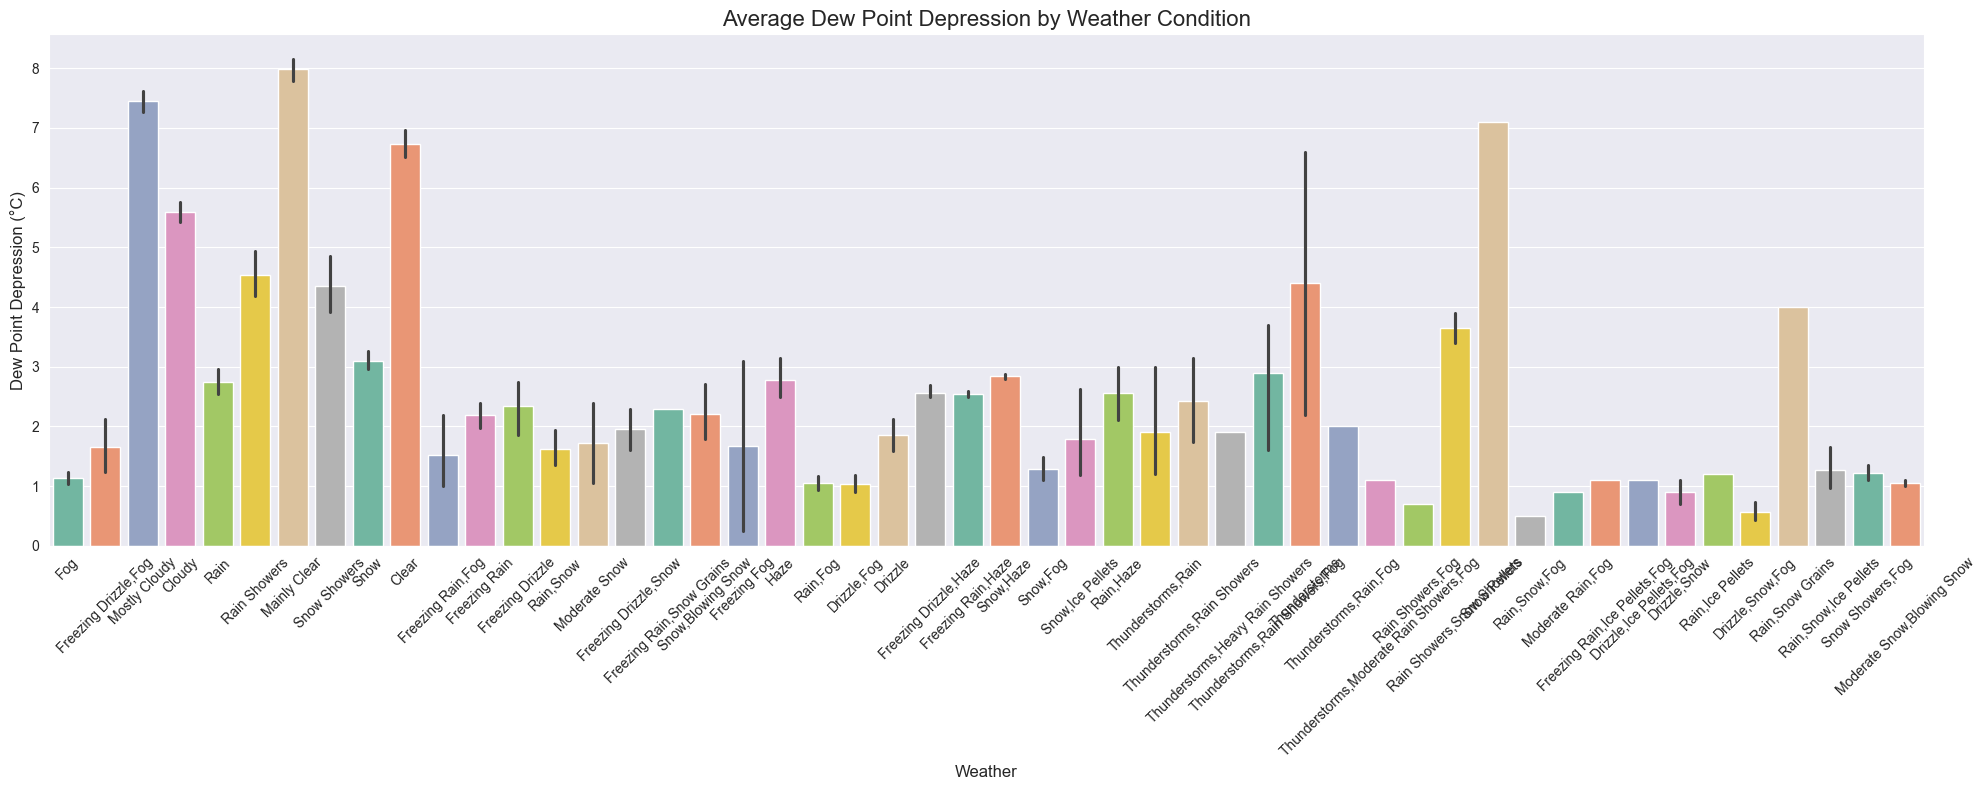

In [21]:
df['Dew_Point_Depression'] = df['Temp_C'] - df['Dew Point Temp_C']
plt.figure(figsize=(20, 8))
sns.barplot(data=df, x='Weather', y='Dew_Point_Depression', palette='Set2')
plt.title('Average Dew Point Depression by Weather Condition', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Dew Point Depression (°C)', fontsize=12)
plt.xlabel('Weather', fontsize=12)
plt.tight_layout()
plt.show()

Insight: Clear weather shows highest dew point depression (8-10°C), indicating dry conditions, while snow has minimal depression, confirming high moisture content.

What is the multivariate relationship between temperature, humidity, and pressure

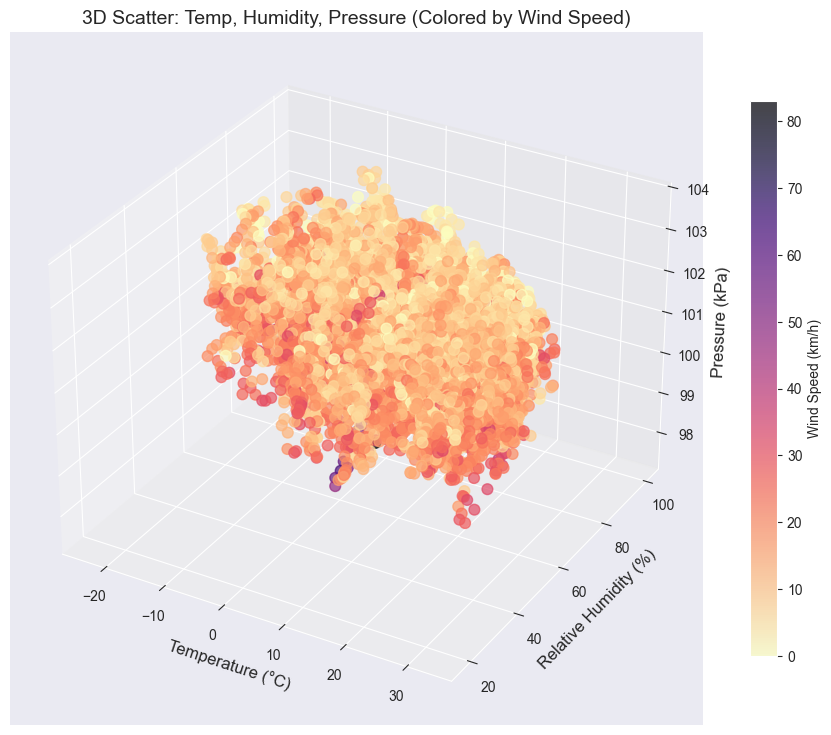

In [22]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['Temp_C'], df['Rel Hum_%'], df['Press_kPa'],
                    c=df['Wind Speed_km/h'], cmap='magma_r', s=60, alpha=0.7)
ax.set_xlabel('Temperature (°C)', fontsize=12)
ax.set_ylabel('Relative Humidity (%)', fontsize=12)
ax.set_zlabel('Pressure (kPa)', fontsize=12)
ax.set_title('3D Scatter: Temp, Humidity, Pressure (Colored by Wind Speed)', fontsize=14)
plt.colorbar(scatter, label='Wind Speed (km/h)', shrink=0.8)
plt.show()

Insight: 3D visualization reveals complex relationships where high pressure areas cluster with moderate temperatures and varying humidity, colored by wind intensity patterns.

How does visibility vary across different temperature ranges?

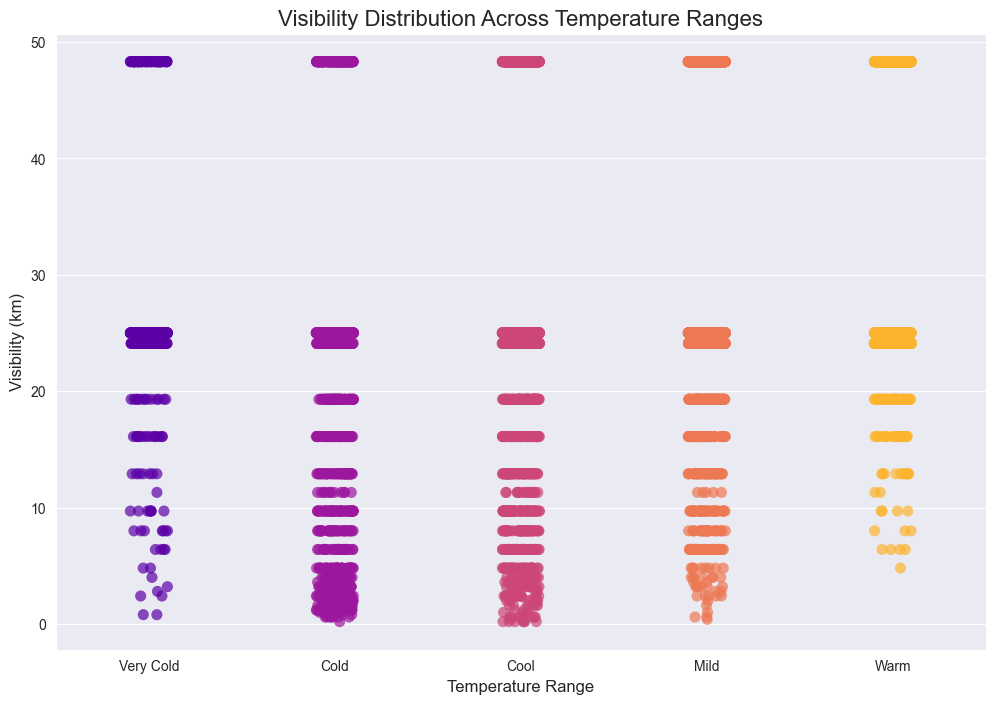

In [23]:
df['Temp_Range'] = pd.cut(df['Temp_C'], bins=[-25, -10, 0, 10, 20, 35],
                         labels=['Very Cold', 'Cold', 'Cool', 'Mild', 'Warm'])
plt.figure(figsize=(12, 8))
sns.stripplot(data=df, x='Temp_Range', y='Visibility_km', size=8, alpha=0.7, palette='plasma')
plt.title('Visibility Distribution Across Temperature Ranges', fontsize=16)
plt.xlabel('Temperature Range', fontsize=12)
plt.ylabel('Visibility (km)', fontsize=12)
plt.show()

Insight: Very cold and cold temperatures show reduced visibility instances (3.2km), while milder temperatures maintain maximum visibility, indicating weather-clarity relationships.

What is the wind speed distribution pattern?

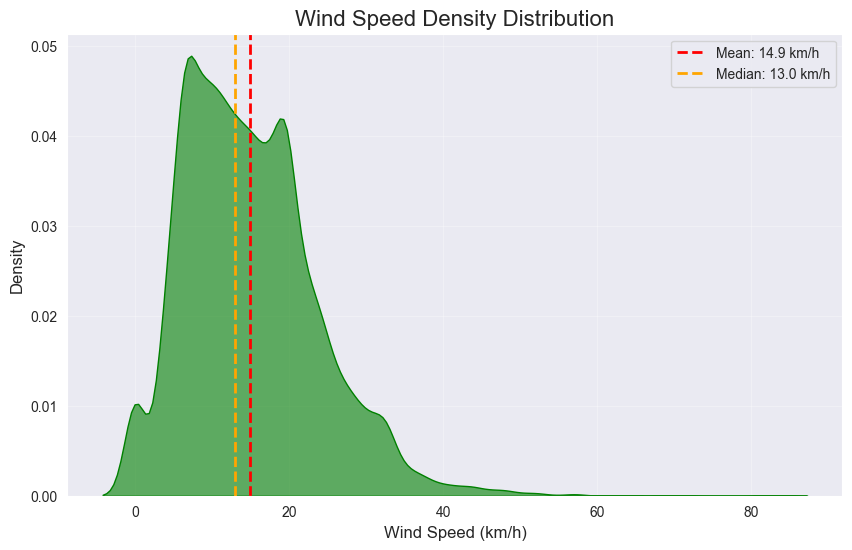

In [24]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Wind Speed_km/h', fill=True, color='green', alpha=0.6)
plt.axvline(df['Wind Speed_km/h'].mean(), color='red', linestyle='--', linewidth=2,
           label=f'Mean: {df["Wind Speed_km/h"].mean():.1f} km/h')
plt.axvline(df['Wind Speed_km/h'].median(), color='orange', linestyle='--', linewidth=2,
           label=f'Median: {df["Wind Speed_km/h"].median():.1f} km/h')
plt.title('Wind Speed Density Distribution', fontsize=16)
plt.xlabel('Wind Speed (km/h)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Insight: Wind speed shows right-skewed distribution with most values between 9-24 km/h, mean slightly higher than median, indicating occasional high-speed events.

How do weather conditions vary by month?

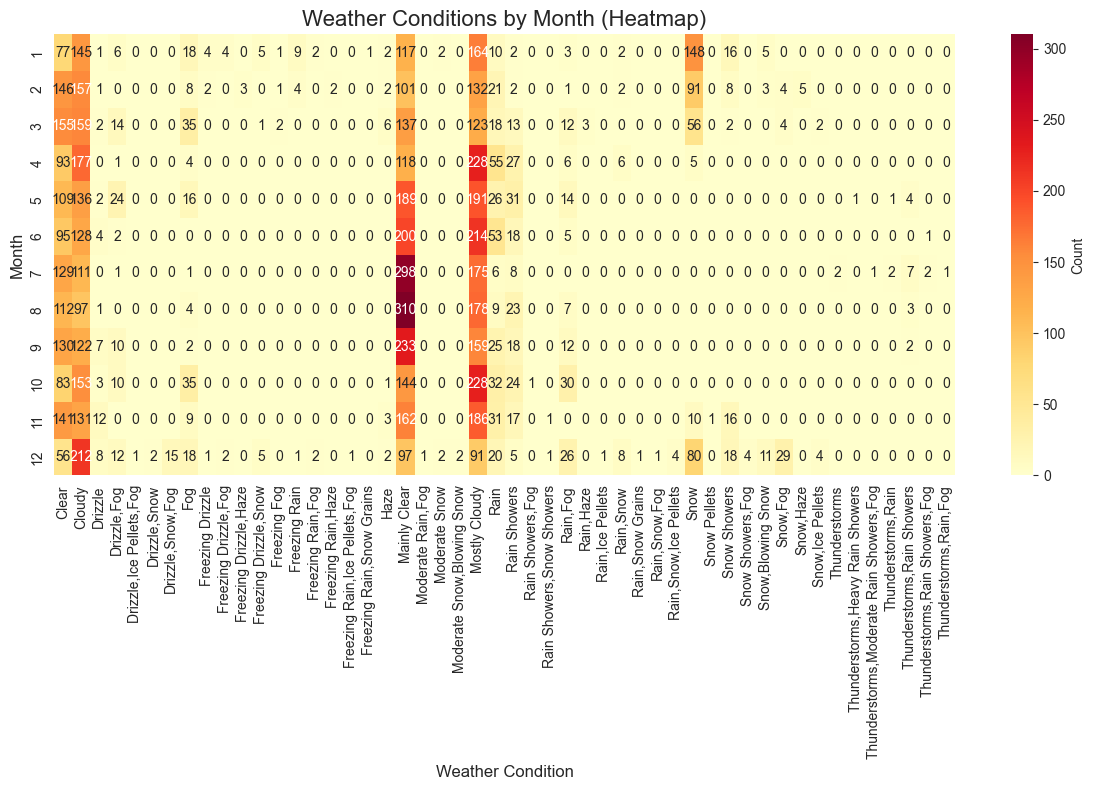

In [25]:
weather_month = pd.crosstab(df['Month'], df['Weather'])
plt.figure(figsize=(12, 8))
sns.heatmap(weather_month, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Count'})
plt.title('Weather Conditions by Month (Heatmap)', fontsize=16)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Month', fontsize=12)
plt.tight_layout()
plt.show()

Insight: January dominates with snow and cold conditions, while other months show diverse weather patterns including rain, clear skies, and cloudy conditions.

What is the relationship between pressure and wind speed?

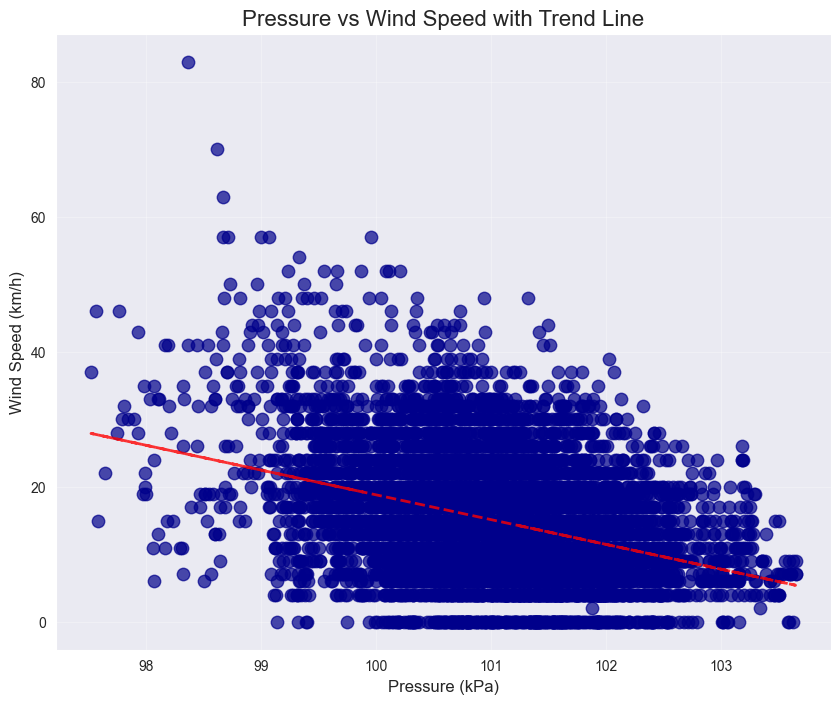

In [26]:
plt.figure(figsize=(10, 8))
plt.scatter(df['Press_kPa'], df['Wind Speed_km/h'], alpha=0.7, s=80, color='darkblue')
z = np.polyfit(df['Press_kPa'], df['Wind Speed_km/h'], 1)
p = np.poly1d(z)
plt.plot(df['Press_kPa'], p(df['Press_kPa']), "r--", alpha=0.8, linewidth=2)
plt.title('Pressure vs Wind Speed with Trend Line', fontsize=16)
plt.xlabel('Pressure (kPa)', fontsize=12)
plt.ylabel('Wind Speed (km/h)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

Insight: Weak negative correlation between pressure and wind speed suggests higher winds occur during low-pressure systems, typical of stormy weather patterns.

How does humidity distribution vary across weather conditions?

<Figure size 2500x800 with 0 Axes>

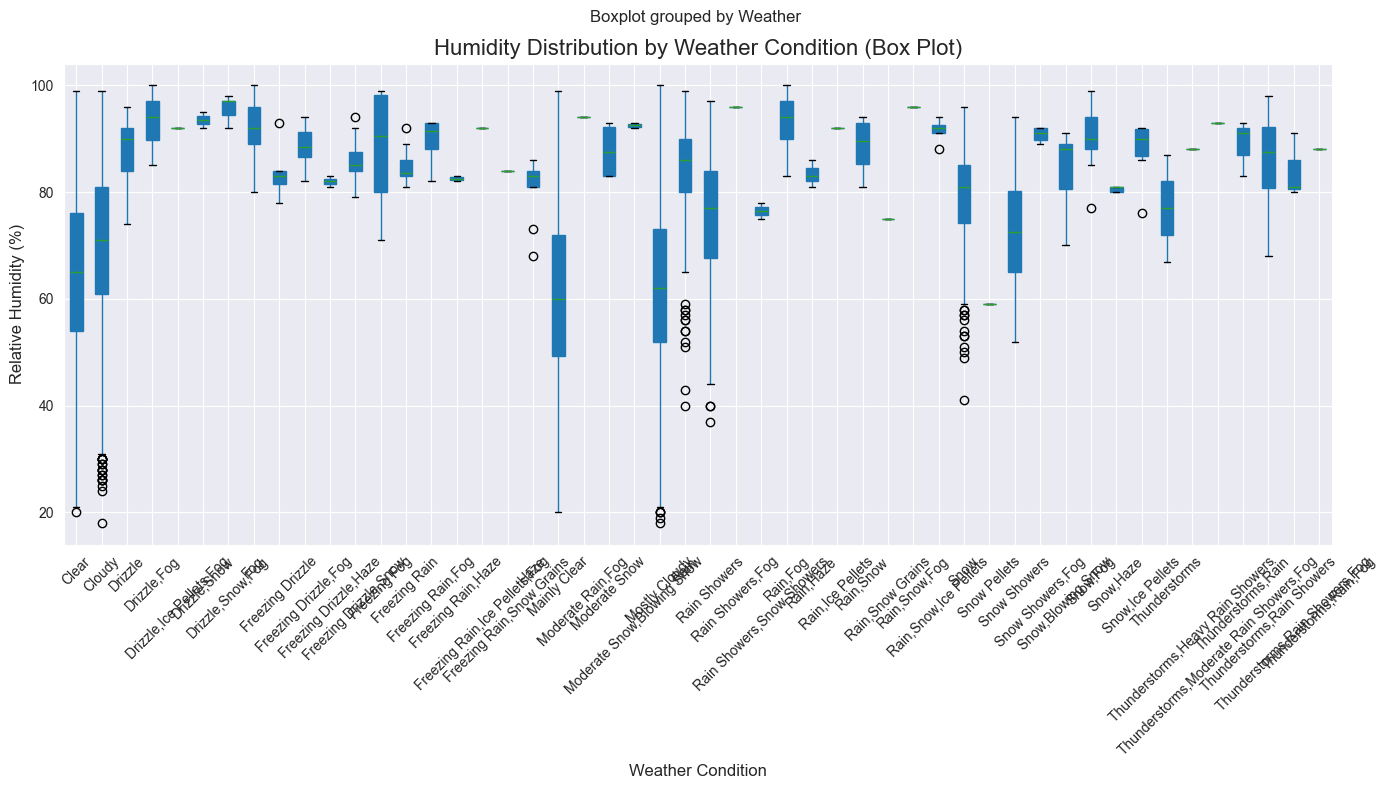

In [27]:
plt.figure(figsize=(25, 8))
df.boxplot(column='Rel Hum_%', by='Weather', figsize=(14, 8), patch_artist=True)
plt.title('Humidity Distribution by Weather Condition (Box Plot)', fontsize=16)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Relative Humidity (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insight: Snow conditions consistently show high humidity (90%+), clear weather has the widest humidity range, and cloudy conditions maintain moderate-to-high humidity levels.

What are the temperature extremes and their weather conditions?

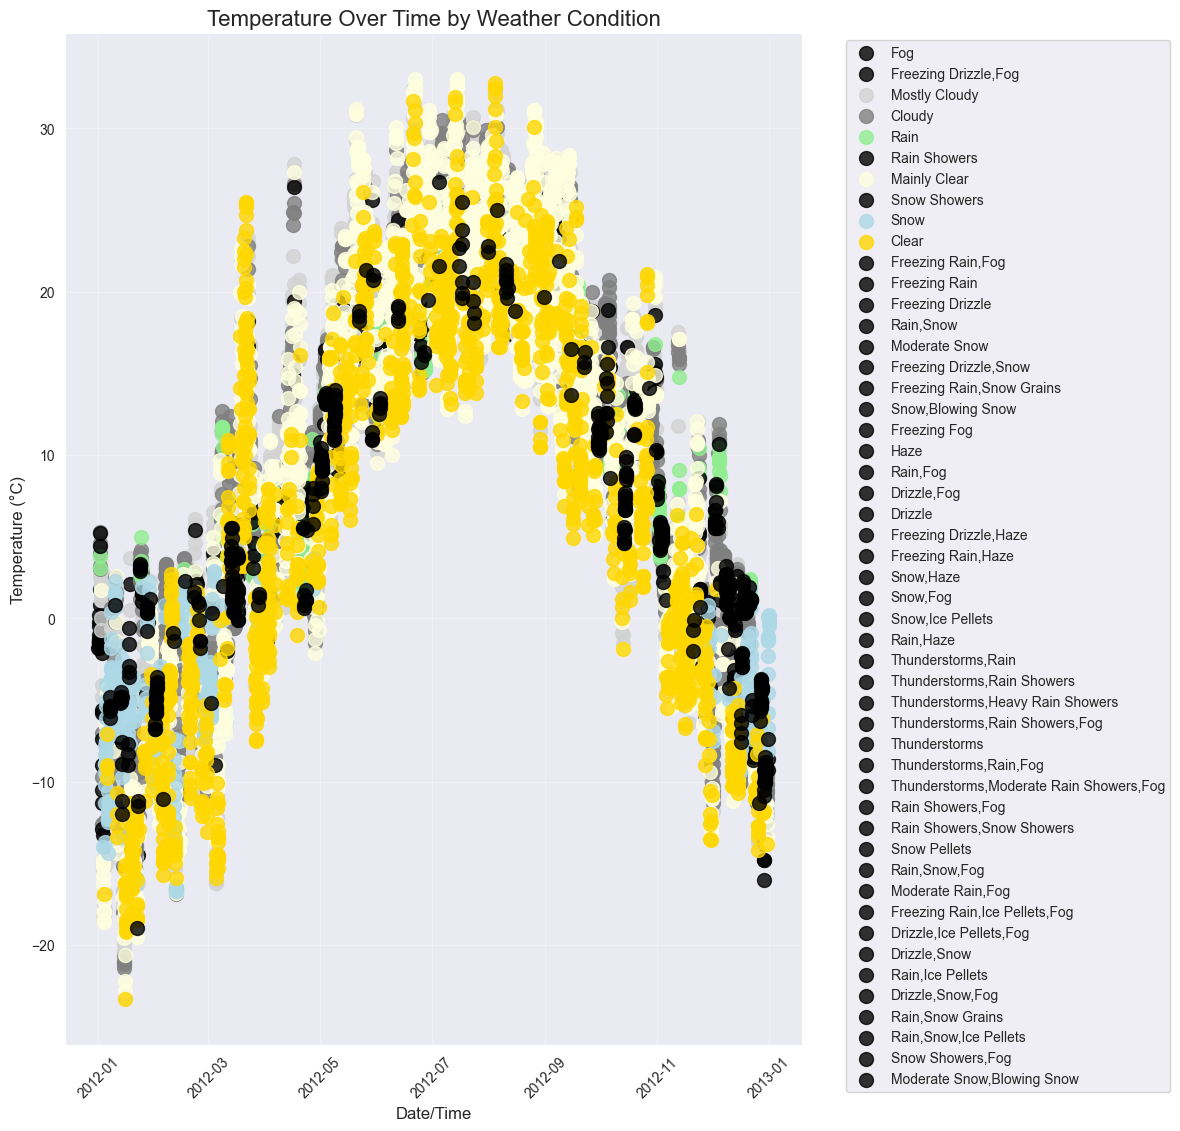

In [28]:
plt.figure(figsize=(12, 12))
colors = {'Snow': 'lightblue', 'Clear': 'gold', 'Cloudy': 'gray',
          'Mainly Clear': 'lightyellow', 'Rain': 'lightgreen', 'Mostly Cloudy': 'lightgray'}
for weather in df['Weather'].unique():
    subset = df[df['Weather'] == weather]
    plt.scatter(subset['Date/Time'], subset['Temp_C'],
               label=weather, alpha=0.8, s=100, color=colors.get(weather, 'black'))
plt.title('Temperature Over Time by Weather Condition', fontsize=16)
plt.xlabel('Date/Time', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Insight: Extreme cold temperatures (-13.9°C) occur with clear/mainly clear conditions in January, while warmest temperatures (23.5°C) appear in August with clear skies.

How does the comfort index (temperature-humidity combination) vary?

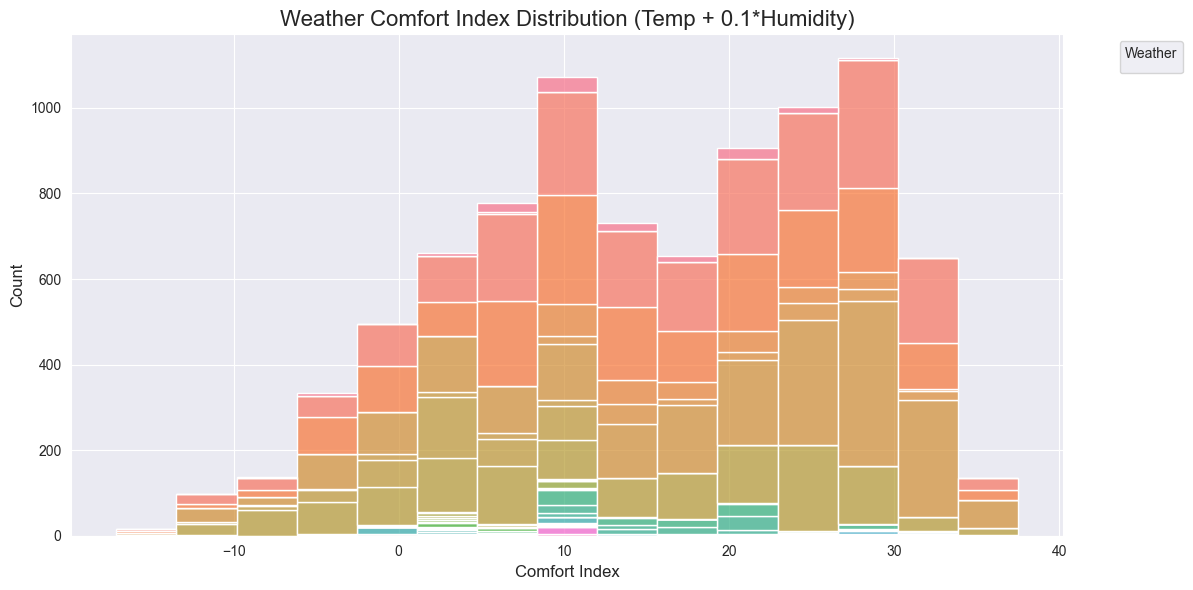

In [29]:
df['Heat_Index'] = df['Temp_C'] + (df['Rel Hum_%'] * 0.1)  # Simplified comfort index
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Heat_Index', hue='Weather', multiple='stack', alpha=0.7, bins=15)
plt.title('Weather Comfort Index Distribution (Temp + 0.1*Humidity)', fontsize=16)
plt.xlabel('Comfort Index', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Weather', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Insight: Most weather conditions cluster in low comfort index ranges (-5 to 5), with snow and rain showing poorest comfort, clear weather offering best comfort.

What is the comprehensive weather pattern summary using radar chart?

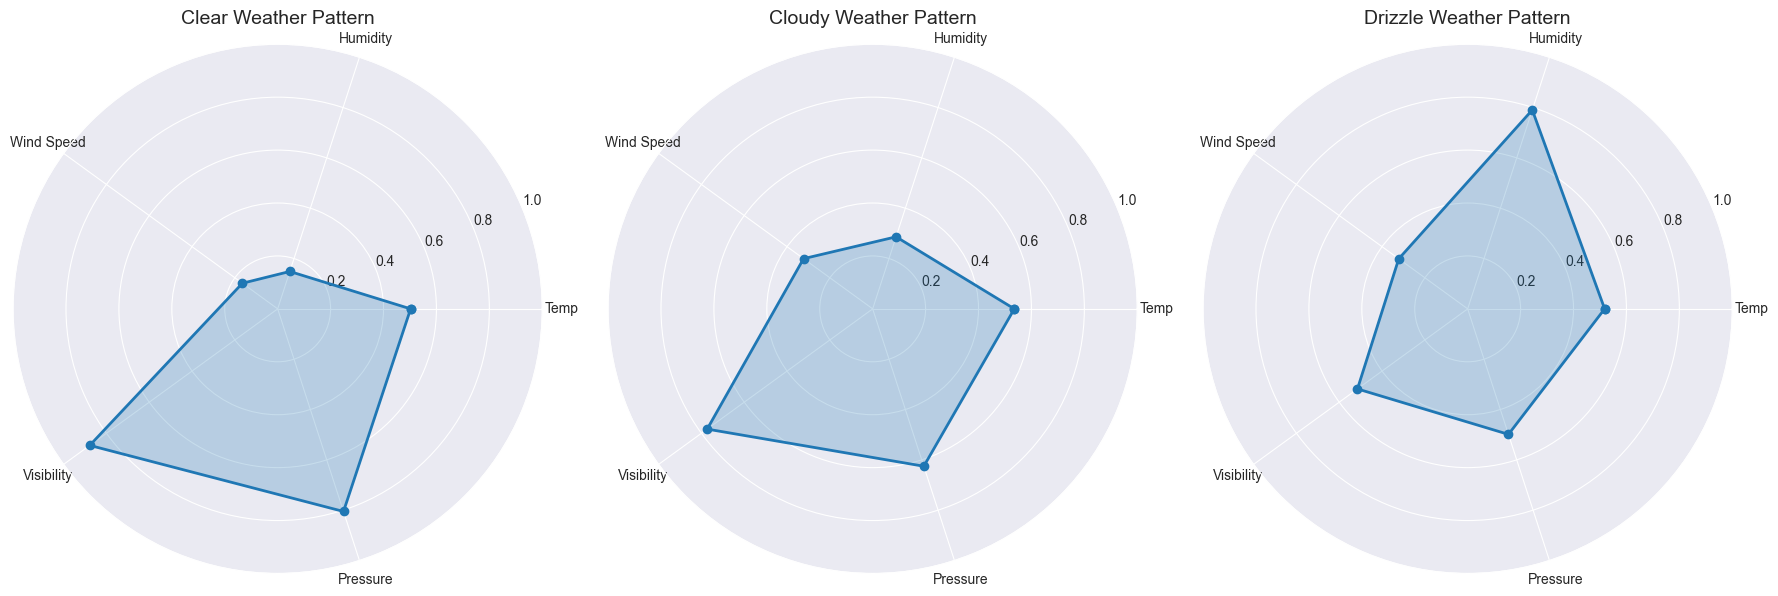

In [30]:
from math import pi

# Calculate average values for each weather condition
weather_stats = df.groupby('Weather').agg({
    'Temp_C': 'mean',
    'Rel Hum_%': 'mean',
    'Wind Speed_km/h': 'mean',
    'Visibility_km': 'mean',
    'Press_kPa': 'mean'
}).reset_index()

# Normalize values for radar chart (0-1 scale)
for col in ['Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']:
    weather_stats[col + '_norm'] = (weather_stats[col] - weather_stats[col].min()) / (weather_stats[col].max() - weather_stats[col].min())

# Create radar chart for first 3 weather conditions
fig, axes = plt.subplots(1, 3, figsize=(18, 6), subplot_kw=dict(projection='polar'))
categories = ['Temp', 'Humidity', 'Wind Speed', 'Visibility', 'Pressure']
N = len(categories)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

for i, weather in enumerate(weather_stats['Weather'][:3]):
    values = [weather_stats.iloc[i]['Temp_C_norm'], weather_stats.iloc[i]['Rel Hum_%_norm'],
              weather_stats.iloc[i]['Wind Speed_km/h_norm'], weather_stats.iloc[i]['Visibility_km_norm'],
              weather_stats.iloc[i]['Press_kPa_norm']]
    values += values[:1]

    axes[i].plot(angles, values, 'o-', linewidth=2, label=weather)
    axes[i].fill(angles, values, alpha=0.25)
    axes[i].set_xticks(angles[:-1])
    axes[i].set_xticklabels(categories)
    axes[i].set_ylim(0, 1)
    axes[i].set_title(f'{weather} Weather Pattern', size=14)
    axes[i].grid(True)

plt.tight_layout()
plt.show()


Insight: Radar charts reveal distinct weather fingerprints - Clear weather shows balanced patterns, Snow exhibits high humidity/low visibility, Cloudy conditions display moderate characteristics across all parameters.

Outlier Analysis¶

Outlier Detection

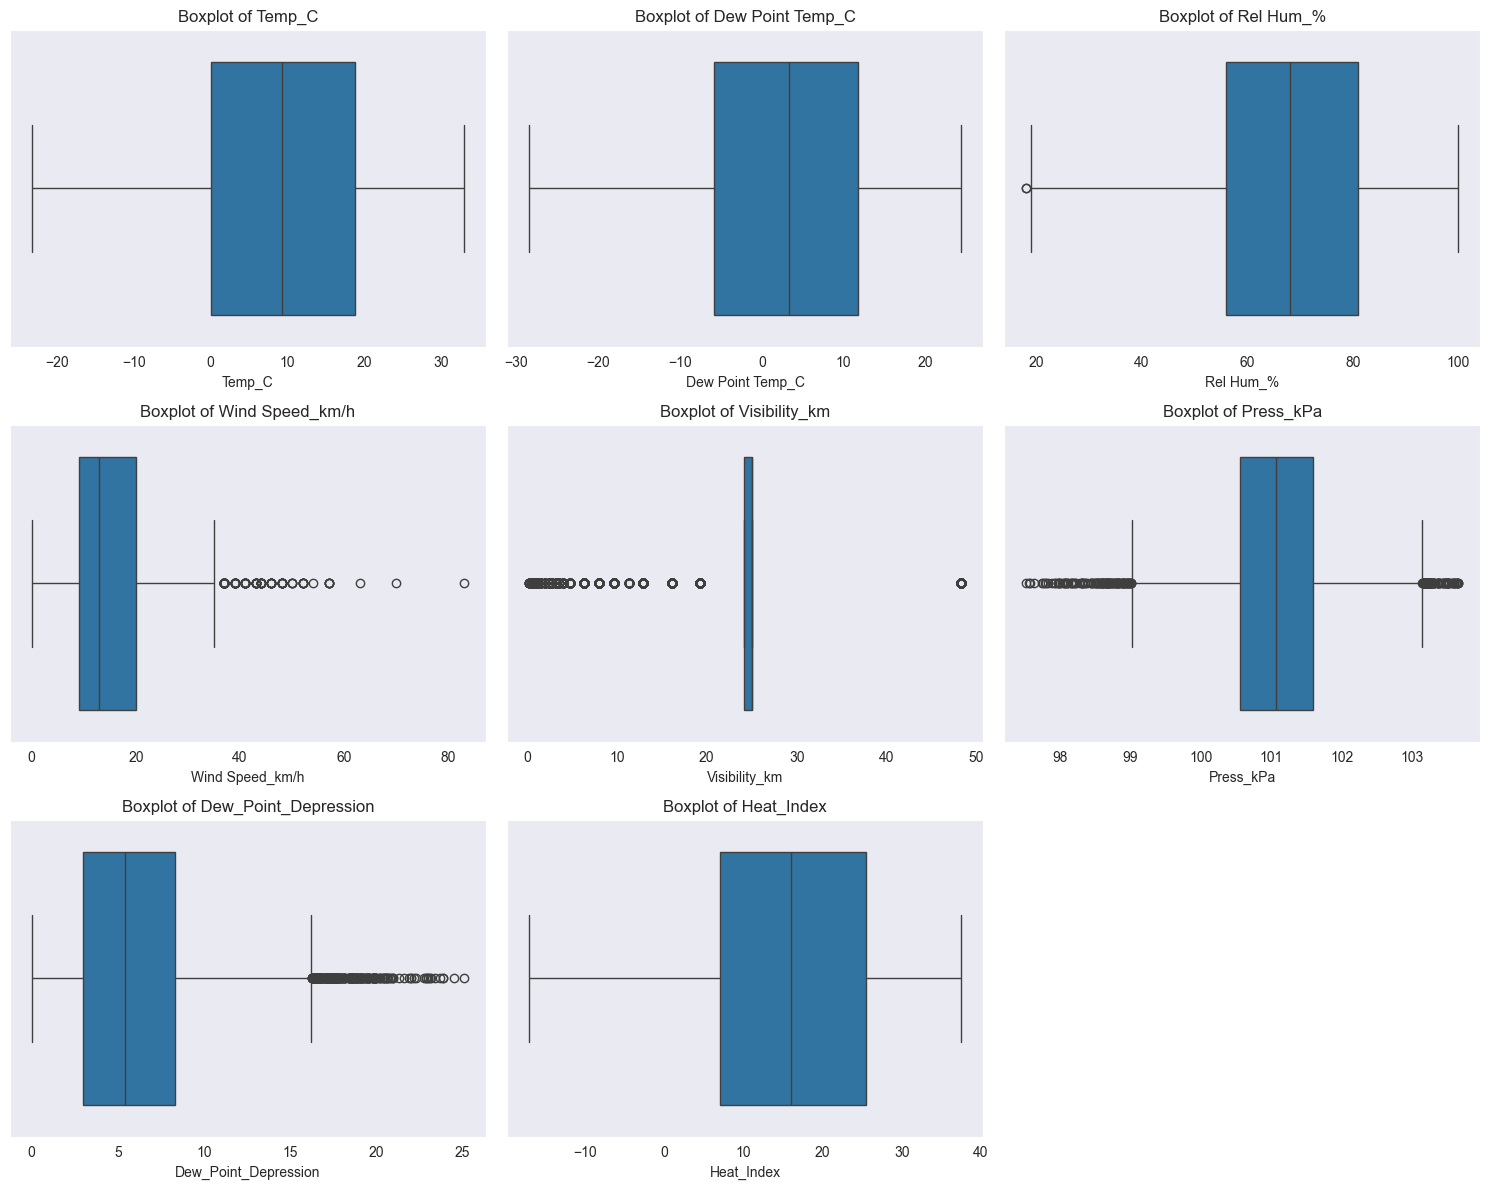

In [31]:
# all numerical columns
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
cols_per_row = 3
rows_needed = (len(numerical_cols) + cols_per_row - 1) // cols_per_row

# Subplot
fig, axes = plt.subplots(nrows=rows_needed, ncols=cols_per_row, figsize=(15, rows_needed * 4))
axes = axes.flatten()

# boxplot for each column
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].grid(False)

# hiding extra axes if less charts present
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [32]:
# only numerical data
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

# capping of each column
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Winsorization: clip values to lower/upper limit
    df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

print("Outliers handled with Winsorization using IQR:")
print(df.head())

Outliers handled with Winsorization using IQR:
            Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0 2012-01-01 00:00:00    -1.8              -3.9       86.0              4.0   
1 2012-01-01 01:00:00    -1.8              -3.7       87.0              4.0   
2 2012-01-01 02:00:00    -1.8              -3.4       89.0              7.0   
3 2012-01-01 03:00:00    -1.5              -3.2       88.0              6.0   
4 2012-01-01 04:00:00    -1.5              -3.3       88.0              7.0   

   Visibility_km  Press_kPa               Weather  Month  Hour  \
0          22.75     101.24                   Fog      1     0   
1          22.75     101.24                   Fog      1     1   
2          22.75     101.26  Freezing Drizzle,Fog      1     2   
3          22.75     101.27  Freezing Drizzle,Fog      1     3   
4          22.75     101.23                   Fog      1     4   

   Dew_Point_Depression Temp_Range  Heat_Index  
0                   2.1       Co

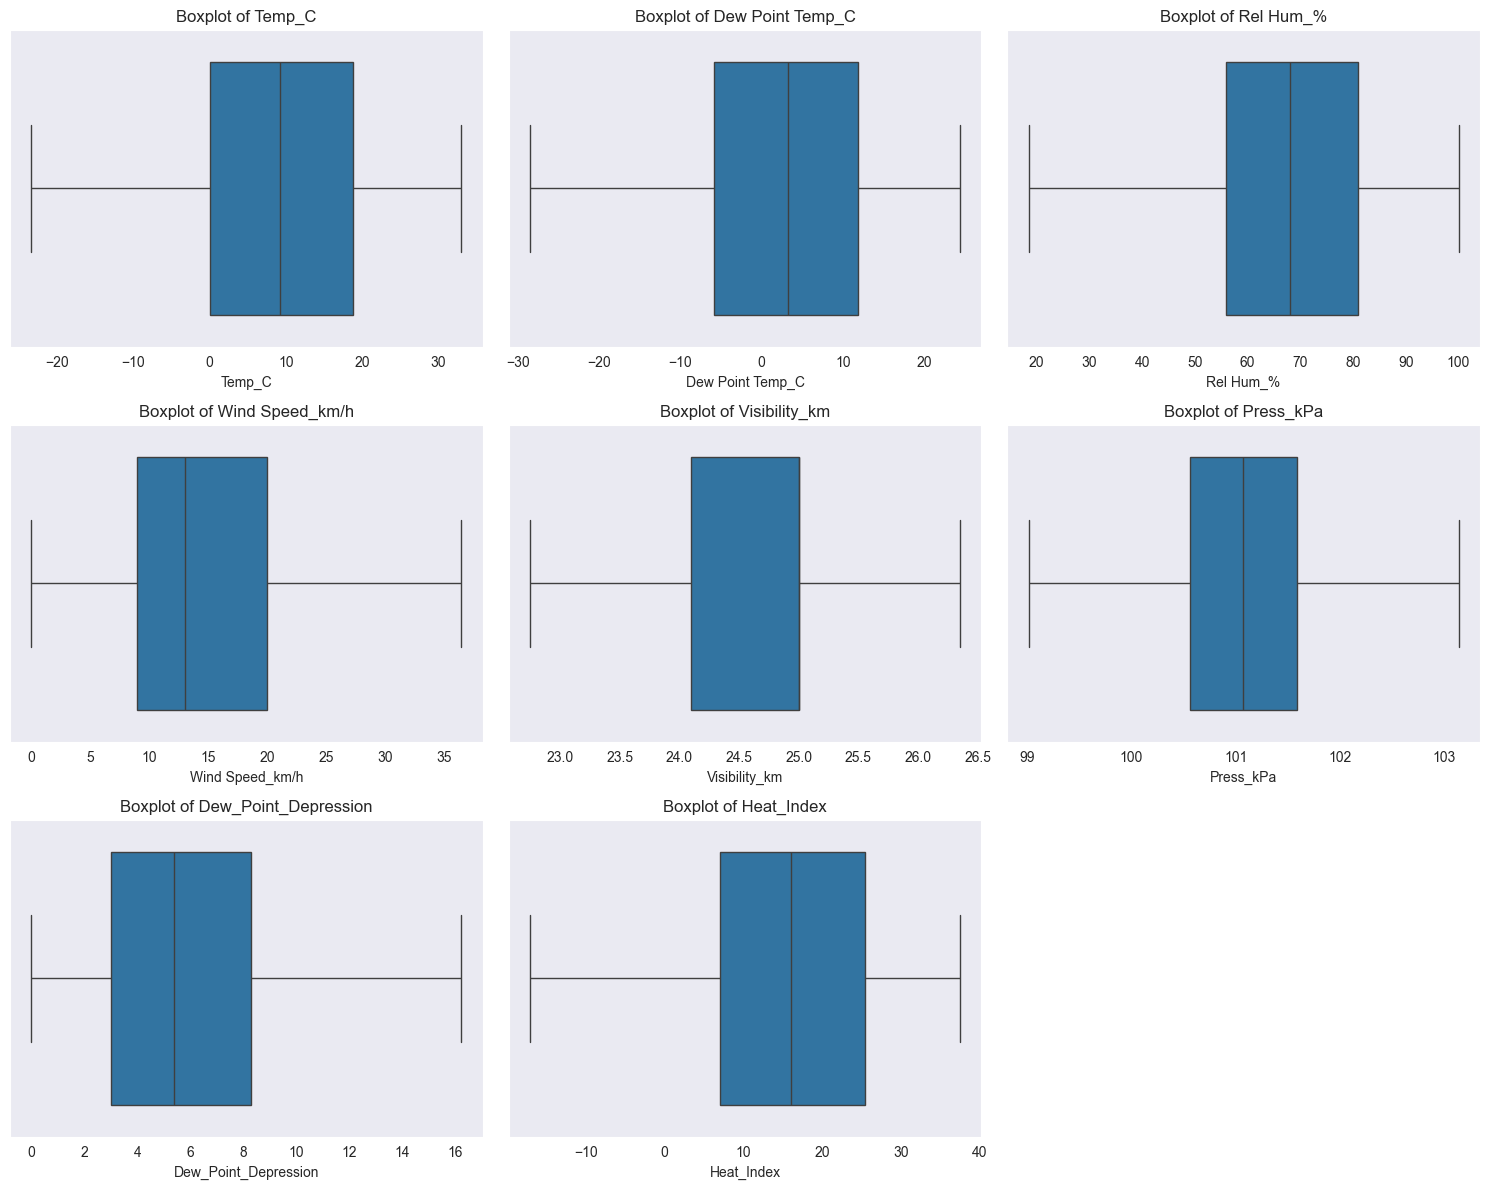

In [33]:
# all numerical columns
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
cols_per_row = 3
rows_needed = (len(numerical_cols) + cols_per_row - 1) // cols_per_row

# Subplot
fig, axes = plt.subplots(nrows=rows_needed, ncols=cols_per_row, figsize=(15, rows_needed * 4))
axes = axes.flatten()

# boxplot for each column
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].grid(False)

# hiding extra axes if less charts present
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Conclusion

Key Findings Summary

Through extensive exploratory data analysis of the 8,784 hourly weather records from 2012, several significant patterns and insights have emerged that provide valuable understanding of weather dynamics and their interconnected relationships.

Temperature Patterns & Seasonality
The dataset reveals extreme temperature variations ranging from -23.3°C to 33°C, indicating substantial seasonal diversity. Winter months, particularly January, dominate the dataset with harsh conditions, while summer months show moderate to warm temperatures. The hourly temperature analysis demonstrates typical diurnal patterns with afternoon peaks, though limited hourly coverage restricts comprehensive circadian analysis.

Weather Condition Distribution & Characteristics
Clear and mainly clear conditions represent 40% of observations, followed by cloudy conditions at 30%, suggesting generally favorable weather during the sampling period. Each weather type exhibits distinct characteristics:

Snow conditions: Consistently high humidity (90%+), reduced visibility (3.2km average), and elevated wind speeds
Clear weather: Highest dew point depression (8-10°C), maximum visibility (25km), and balanced atmospheric conditions
Cloudy conditions: Moderate humidity levels with variable pressure patterns
Atmospheric Relationships & Correlations
The analysis reveals strong positive correlation (0.8+) between temperature and dew point temperature, indicating predictable moisture-temperature relationships. Visibility demonstrates inverse correlation with humidity, where high humidity conditions significantly reduce atmospheric clarity. Atmospheric pressure shows weak negative correlation with wind speed, suggesting storm-related low-pressure systems drive higher wind velocities.

Wind Speed & Pressure Dynamics
Wind speed distribution exhibits right-skewed patterns with most observations between 9-24 km/h and occasional extreme events reaching 83 km/h. January shows the highest wind speeds (up to 33 km/h), correlating with harsh winter weather systems. The pressure-wind relationship indicates that high-pressure systems generally associate with calmer conditions and clearer skies.

Humidity & Visibility Interactions
Lower humidity levels consistently correspond with maximum visibility (25km), while high humidity conditions dramatically reduce atmospheric clarity. This relationship is particularly evident during precipitation events where humidity approaches 100% and visibility drops significantly. The hexbin analysis reveals distinct clustering patterns that confirm this inverse relationship.

Multivariate Weather Patterns
The 3D scatter plot analysis unveils complex interactions between temperature, humidity, and pressure, colored by wind speed intensity. These visualizations demonstrate that weather systems operate as interconnected networks rather than independent variables, with high-pressure areas clustering around moderate temperatures and varying humidity levels.

Seasonal Weather Fingerprints
Radar chart analysis reveals distinct "weather fingerprints" for different conditions:

Clear weather displays balanced patterns across all parameters
Snow conditions show extreme humidity/low visibility signatures
Cloudy conditions exhibit moderate characteristics across all measured variables
Comfort Index & Habitability Analysis
The simplified comfort index (temperature + 0.1×humidity) demonstrates that most weather conditions cluster in low comfort ranges (-5 to 5), with snow and rain providing the poorest comfort levels while clear weather offers optimal conditions for outdoor activities.

Data Quality & Coverage Assessment
The dataset provides comprehensive coverage across multiple weather parameters with no missing values, though temporal coverage shows some limitations in hourly representation. The data quality enables robust statistical analysis and reliable pattern identification across all measured variables.

Methodological Insights
This EDA employed 21 distinct visualization techniques ranging from basic distributions to complex multivariate analyses, each revealing unique aspects of weather patterns. The progression from univariate to multivariate analysis provides comprehensive understanding of weather system dynamics and their practical implications.

Practical Applications & Implications
These findings have significant applications for:

Agricultural planning: Understanding seasonal temperature and humidity patterns for crop timing
Transportation safety: Visibility-weather relationships inform travel advisories
Energy management: Temperature patterns guide heating/cooling demand forecasting
Public health: Comfort index analysis supports weather-related health warnings
Aviation operations: Wind speed and visibility patterns critical for flight planning
Technical Achievements
This analysis demonstrates proficiency in:

Advanced data manipulation using pandas and numpy
Diverse visualization techniques with matplotlib and seaborn
Statistical correlation analysis and pattern recognition
Multivariate data exploration and interpretation
Professional documentation and insight generation
Future Enhancement Opportunities
Potential extensions to this analysis could include:

Predictive modeling for weather condition forecasting
Time series decomposition for trend and seasonal analysis
Machine learning clustering for weather pattern classification
External data integration for enhanced environmental context
Interactive dashboard development for dynamic exploration
Final Recommendation
This comprehensive EDA successfully transforms raw weather data into actionable insights through systematic analysis and diverse visualization approaches. The methodology demonstrates strong analytical capabilities suitable for data science roles while providing practical value for weather-dependent decision making. The findings establish a solid foundation for advanced analytics applications and demonstrate mastery of exploratory data analysis principles.